# Prosper Loan Data analysis
## by Surjith

## Preliminary Wrangling

> The data set, at first glance, seems to be very vast and insightful. As a person from non-banking background, this dataset was an oppurtunity to understand the factors behind lending activity. Curious, excited and slightly initimidated due to the size & variety of the data set

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
source_df = pd.read_csv('prosperLoanData.csv')

In [3]:
source_df.shape

(113937, 81)

In [4]:
source_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

> Quite a Large dataset, have to select the interested columns to narrow down the analysis

In [5]:
source_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


> Selecting two column set, one set which is club of factors that can possibly affect Credit_Rating and other set for our main analysis where Credit_Rating is taken as is. If the analysis becomes too large with main set, will stop deep dive into Credit_Rating factors

In [6]:
credit_rating_factors = ['EmploymentStatus','IsBorrowerHomeowner','CreditGrade','CreditScoreRangeLower','CreditScoreRangeUpper','OpenRevolvingAccounts','CurrentDelinquencies','AmountDelinquent','BankcardUtilization','AvailableBankcardCredit','EmploymentStatusDuration','TotalProsperPaymentsBilled','OnTimeProsperPayments']
interested_columns = ['CreditGrade','LoanStatus','ListingCreationDate','ListingCategory (numeric)','BorrowerRate','EstimatedReturn','ProsperRating (Alpha)','ProsperScore','Occupation','EmploymentStatus','DebtToIncomeRatio','IncomeRange','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment']

> Seperating these two column sets to two dataframes

In [7]:
df = source_df[interested_columns]
credit_df = source_df[credit_rating_factors]
df.head()

,CreditGrade,LoanStatus,ListingCreationDate,ListingCategory (numeric),BorrowerRate,EstimatedReturn,ProsperRating (Alpha),ProsperScore,Occupation,EmploymentStatus,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
0,C,Completed,2007-08-26 19:09:29.263000000,0,0.1580,NaN,NaN,NaN,Other,Self-employed,0.17,"$25,000-49,999",3083.333333,9425,330.43
1,NaN,Current,2014-02-27 08:28:07.900000000,2,0.0920,0.05470,A,7.0,Professional,Employed,0.18,"$50,000-74,999",6125.000000,10000,318.93
2,HR,Completed,2007-01-05 15:00:47.090000000,0,0.2750,NaN,NaN,NaN,Other,Not available,0.06,Not displayed,2083.333333,3001,123.32
3,NaN,Current,2012-10-22 11:02:35.010000000,16,0.0974,0.06000,A,9.0,Skilled Labor,Employed,0.15,"$25,000-49,999",2875.000000,10000,321.45
4,NaN,Current,2013-09-14 18:38:39.097000000,2,0.2085,0.09066,D,4.0,Executive,Employed,0.26,"$100,000+",9583.333333,15000,563.97


In [8]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EmploymentStatus            111682 non-null  object 
 1   IsBorrowerHomeowner         113937 non-null  bool   
 2   CreditGrade                 28953 non-null   object 
 3   CreditScoreRangeLower       113346 non-null  float64
 4   CreditScoreRangeUpper       113346 non-null  float64
 5   OpenRevolvingAccounts       113937 non-null  int64  
 6   CurrentDelinquencies        113240 non-null  float64
 7   AmountDelinquent            106315 non-null  float64
 8   BankcardUtilization         106333 non-null  float64
 9   AvailableBankcardCredit     106393 non-null  float64
 10  EmploymentStatusDuration    106312 non-null  float64
 11  TotalProsperPaymentsBilled  22085 non-null   float64
 12  OnTimeProsperPayments       22085 non-null   float64
dtypes: bool(1), fl

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CreditGrade                28953 non-null   object 
 1   LoanStatus                 113937 non-null  object 
 2   ListingCreationDate        113937 non-null  object 
 3   ListingCategory (numeric)  113937 non-null  int64  
 4   BorrowerRate               113937 non-null  float64
 5   EstimatedReturn            84853 non-null   float64
 6   ProsperRating (Alpha)      84853 non-null   object 
 7   ProsperScore               84853 non-null   float64
 8   Occupation                 110349 non-null  object 
 9   EmploymentStatus           111682 non-null  object 
 10  DebtToIncomeRatio          105383 non-null  float64
 11  IncomeRange                113937 non-null  object 
 12  StatedMonthlyIncome        113937 non-null  float64
 13  LoanOriginalAmount         11

In [10]:
df.isna().sum()

CreditGrade                  84984
LoanStatus                       0
ListingCreationDate              0
ListingCategory (numeric)        0
BorrowerRate                     0
EstimatedReturn              29084
ProsperRating (Alpha)        29084
ProsperScore                 29084
Occupation                    3588
EmploymentStatus              2255
DebtToIncomeRatio             8554
IncomeRange                      0
StatedMonthlyIncome              0
LoanOriginalAmount               0
MonthlyLoanPayment               0
dtype: int64

In [11]:
df.columns

Index(['CreditGrade', 'LoanStatus', 'ListingCreationDate',
       'ListingCategory (numeric)', 'BorrowerRate', 'EstimatedReturn',
       'ProsperRating (Alpha)', 'ProsperScore', 'Occupation',
       'EmploymentStatus', 'DebtToIncomeRatio', 'IncomeRange',
       'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CreditGrade                28953 non-null   object 
 1   LoanStatus                 113937 non-null  object 
 2   ListingCreationDate        113937 non-null  object 
 3   ListingCategory (numeric)  113937 non-null  int64  
 4   BorrowerRate               113937 non-null  float64
 5   EstimatedReturn            84853 non-null   float64
 6   ProsperRating (Alpha)      84853 non-null   object 
 7   ProsperScore               84853 non-null   float64
 8   Occupation                 110349 non-null  object 
 9   EmploymentStatus           111682 non-null  object 
 10  DebtToIncomeRatio          105383 non-null  float64
 11  IncomeRange                113937 non-null  object 
 12  StatedMonthlyIncome        113937 non-null  float64
 13  LoanOriginalAmount         11

In [13]:
df.describe()

,ListingCategory (numeric),BorrowerRate,EstimatedReturn,ProsperScore,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
count,113937.000000,113937.000000,84853.000000,84853.000000,105383.000000,1.139370e+05,113937.00000,113937.000000
mean,2.774209,0.192764,0.096068,5.950067,0.275947,5.608026e+03,8337.01385,272.475783
std,3.996797,0.074818,0.030403,2.376501,0.551759,7.478497e+03,6245.80058,192.697812
min,0.000000,0.000000,-0.182700,1.000000,0.000000,0.000000e+00,1000.00000,0.000000
25%,1.000000,0.134000,0.074080,4.000000,0.140000,3.200333e+03,4000.00000,131.620000
50%,1.000000,0.184000,0.091700,6.000000,0.220000,4.666667e+03,6500.00000,217.740000
75%,3.000000,0.250000,0.116600,8.000000,0.320000,6.825000e+03,12000.00000,371.580000
max,20.000000,0.497500,0.283700,11.000000,10.010000,1.750003e+06,35000.00000,2251.510000


In [14]:
df.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [15]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

### What is the structure of your dataset?

> The data set consists of 81 columns & 113937 entries

### What is/are the main feature(s) of interest in your dataset?

> 1) Credit Grade + Prosper Score - To be combined as credit rating<br>
2) StatedMonthlyIncome - will derive income range from this<br>
3) Estimated Return <br>
4) Prosper Score <br>
5) Loan Status


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 1) Debt To income Ratio <br>
2) Employment Status <br>
3) Listing Category <br>
4) ListingCreationDate - To derive year and plot trends <br>

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [16]:
df.head(5)

,CreditGrade,LoanStatus,ListingCreationDate,ListingCategory (numeric),BorrowerRate,EstimatedReturn,ProsperRating (Alpha),ProsperScore,Occupation,EmploymentStatus,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
0,C,Completed,2007-08-26 19:09:29.263000000,0,0.1580,NaN,NaN,NaN,Other,Self-employed,0.17,"$25,000-49,999",3083.333333,9425,330.43
1,NaN,Current,2014-02-27 08:28:07.900000000,2,0.0920,0.05470,A,7.0,Professional,Employed,0.18,"$50,000-74,999",6125.000000,10000,318.93
2,HR,Completed,2007-01-05 15:00:47.090000000,0,0.2750,NaN,NaN,NaN,Other,Not available,0.06,Not displayed,2083.333333,3001,123.32
3,NaN,Current,2012-10-22 11:02:35.010000000,16,0.0974,0.06000,A,9.0,Skilled Labor,Employed,0.15,"$25,000-49,999",2875.000000,10000,321.45
4,NaN,Current,2013-09-14 18:38:39.097000000,2,0.2085,0.09066,D,4.0,Executive,Employed,0.26,"$100,000+",9583.333333,15000,563.97


In [17]:
base_color = sb.color_palette()[9]

**Combine Prosper Rating & credit grade into one column**
> Combining Prosper Rating & Credit Grade into one column and coverting them to ordinal category data. As per the variables definition, seems to contain same type of information

In [18]:
df['ProsperRating (Alpha)'].fillna(df['CreditGrade'],inplace=True)
df=df.drop(['CreditGrade'],1)
df.rename(columns={'ProsperRating (Alpha)':'Credit_Rating'}, inplace=True)

C:\Users\surji\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [19]:
df['Credit_Rating'].value_counts()

C     23994
B     19970
D     19427
A     17866
E     13084
HR    10443
AA     8881
NC      141
Name: Credit_Rating, dtype: int64

In [20]:
rating_order = ['HR','E','D','C','B','A','AA']
df['Credit_Rating']=df['Credit_Rating'].astype(pd.api.types.CategoricalDtype(ordered = True, categories = rating_order))
df['Credit_Rating'].value_counts()

C     23994
B     19970
D     19427
A     17866
E     13084
HR    10443
AA     8881
Name: Credit_Rating, dtype: int64

Text(0, 0.5, 'Count')

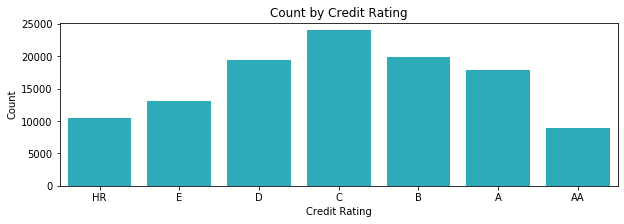

In [21]:
f, ax = plt.subplots(figsize=(10, 3))
ax = sb.countplot(data = df, x="Credit_Rating",color=base_color)
ax.set_title('Count by Credit Rating')
ax.set_xlabel('Credit Rating')
ax.set_ylabel('Count')

> My hypothesis on this data was that people with lower Credit_Rating would prefer this platform as people with higher rating might rely on traditional banking channels. I was proven wrong and spectacularly so. the people with high rating (AA & A) are significantly higher than the ones with HR & E

**Distribution of Loan status**

Text(0, 0.5, 'Count')

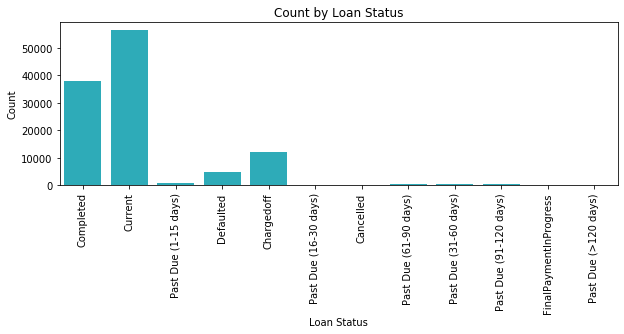

In [22]:
f, ax = plt.subplots(figsize=(10, 3))
ax = sb.countplot(data = df, x="LoanStatus",color=base_color)
plt.xticks(rotation="90")
ax.set_title('Count by Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')

In [23]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [24]:
df['LoanStatus']=df['LoanStatus'].apply(lambda x:'Past Due' if 'Past' in x else x)

In [25]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatus, dtype: int64

In [26]:
status_order = ['Defaulted','Chargedoff','Past Due','Current','FinalPaymentInProgress','Completed']
df['LoanStatus']=df['LoanStatus'].astype(pd.api.types.CategoricalDtype(ordered = True, categories = status_order))

**Consolidating values in Loan Status**
> There seems to be many values which are past due but with different aging period. Combining this to one value will make this column simpler to analyze

Text(0, 0.5, 'Count')

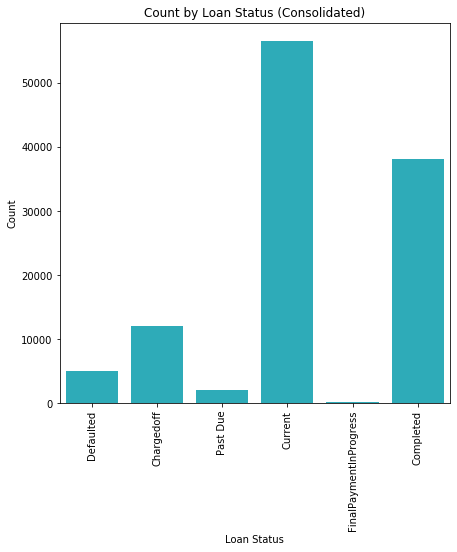

In [27]:
f, ax = plt.subplots(figsize=(7, 7))
ax = sb.countplot(data = df, x="LoanStatus",color=base_color)
plt.xticks(rotation="90")
ax.set_title('Count by Loan Status (Consolidated)')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')

> Loan status values can furthur be consolidated into two sets of values: good loan & bad loan for simpler analysis. **Creating a new column 'Loan quality' for the same while retaining loan status for granular analysis**

In [28]:
df['Quality_of_Loan'] = df['LoanStatus']
df['Quality_of_Loan'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Name: Quality_of_Loan, dtype: int64

In [29]:
df['Quality_of_Loan'].replace('Defaulted','Bad Loan',inplace=True)
df['Quality_of_Loan'].replace('Chargedoff','Bad Loan',inplace=True)
df['Quality_of_Loan'].replace('Past Due','Bad Loan',inplace=True)

In [30]:
df['Quality_of_Loan'].replace('Completed','Good Loan',inplace=True)
df['Quality_of_Loan'].replace('FinalPaymentInProgress','Good Loan',inplace=True)
df['Quality_of_Loan'].replace('Current',np.nan,inplace=True)
df['Quality_of_Loan'].value_counts()

Good Loan    38279
Bad Loan     19077
Name: Quality_of_Loan, dtype: int64

Text(0, 0.5, 'Count')

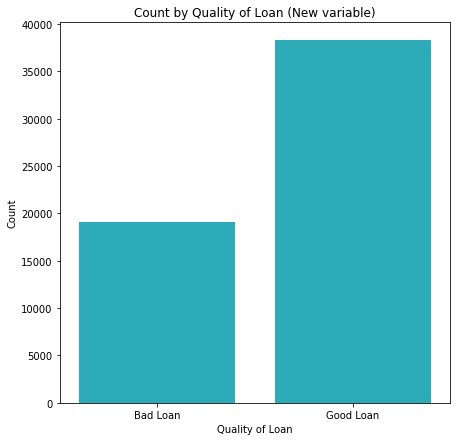

In [31]:
f, ax = plt.subplots(figsize=(7, 7))
ax = sb.countplot(data = df, x="Quality_of_Loan",color=base_color)
ax.set_title('Count by Quality of Loan (New variable)')
ax.set_xlabel('Quality of Loan')
ax.set_ylabel('Count')

**Distribution of Borrower Rate**

Text(0, 0.5, 'Count')

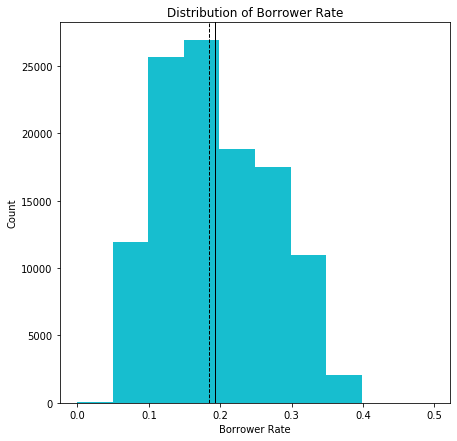

In [32]:
f, ax = plt.subplots(figsize=(7, 7))
plt.hist(data=df,x='BorrowerRate',color=base_color);
plt.axvline(df['BorrowerRate'].mean(), color='k', linewidth=1)
plt.axvline(df['BorrowerRate'].median(), color='k',linestyle='dashed', linewidth=1)
ax.set_title('Distribution of Borrower Rate')
ax.set_xlabel('Borrower Rate')
ax.set_ylabel('Count')

> The borrower rate distribution is right skewed with mean at 0.192 & median at 0.184. Zooming in with customized bins

Text(0, 0.5, 'Count')

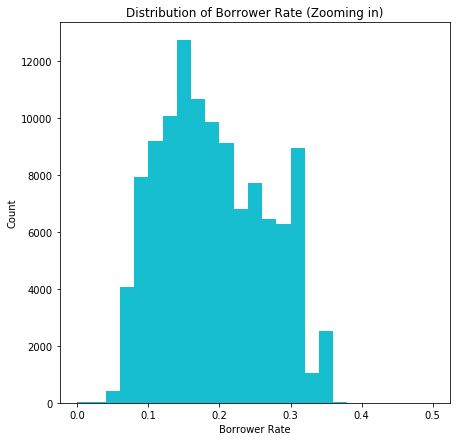

In [33]:
f, ax = plt.subplots(figsize=(7, 7))
bins = np.arange(0,df.BorrowerRate.max()+0.02,0.02)
plt.hist(data=df,x='BorrowerRate',bins=bins,color=base_color);
ax.set_title('Distribution of Borrower Rate (Zooming in)')
ax.set_xlabel('Borrower Rate')
ax.set_ylabel('Count')

> Trying out the same distrubution with seaborn distplot which shows two clear peaks

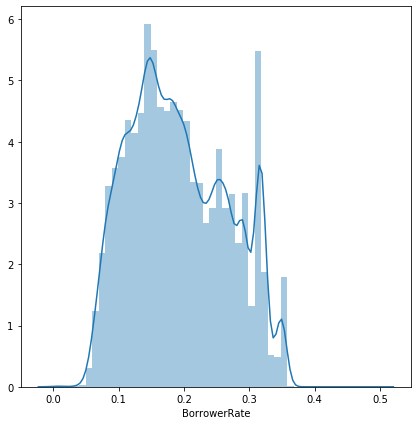

In [34]:
f, ax = plt.subplots(figsize=(7, 7))
sb.distplot(df['BorrowerRate'])

**Distribution of Loan Amount**

Text(0, 0.5, 'Count')

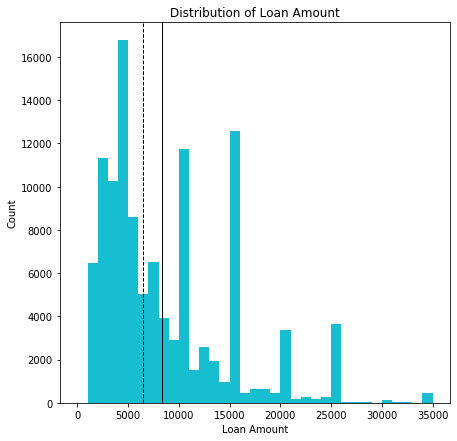

In [35]:
f, ax = plt.subplots(figsize=(7, 7))
bins = np.arange(0,df.LoanOriginalAmount.max()+1000,1000)
plt.hist(data=df,x='LoanOriginalAmount',bins=bins,color=base_color);
plt.axvline(df['LoanOriginalAmount'].mean(), color='k', linewidth=1)
plt.axvline(df['LoanOriginalAmount'].median(), color='k',linestyle='dashed', linewidth=1)
ax.set_title('Distribution of Loan Amount')
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Count')

In [36]:
df['LoanOriginalAmount'].median()

6500.0

> The loan amounts seems to be of smaller sizes with median loan amount at 6500. The

**Distribution of Occupation**

Text(0, 0.5, 'Count(Log)')

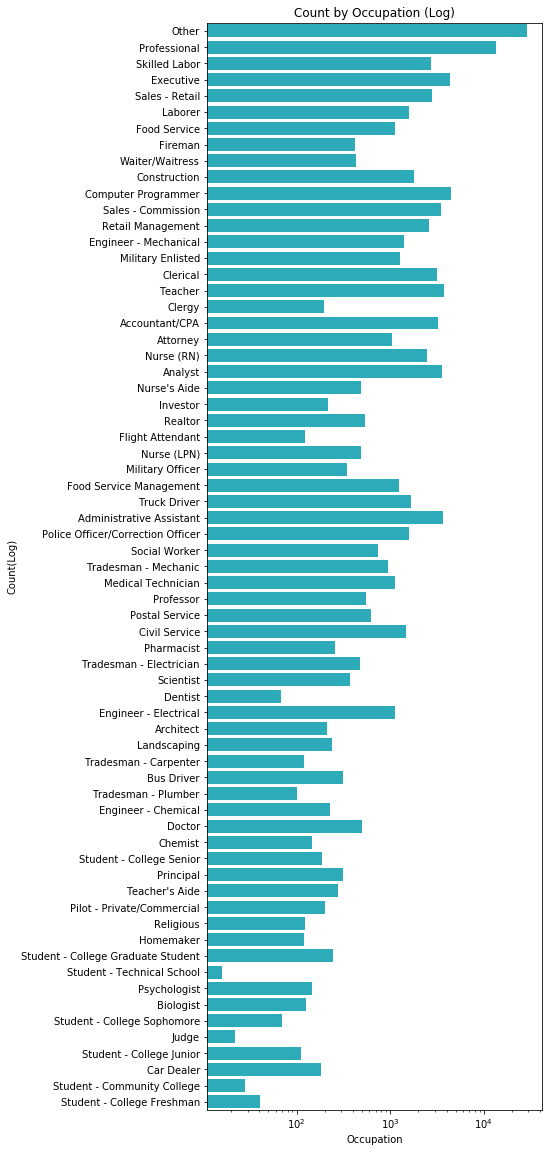

In [37]:
f, ax = plt.subplots(figsize=(6, 20))
ax = sb.countplot(data = df, y="Occupation",color=base_color)
plt.xscale('log');
ax.set_title('Count by Occupation (Log)')
ax.set_xlabel('Occupation')
ax.set_ylabel('Count(Log)')

> Distribution across occupation shows highest number at others. with miniscule number at the other end. Using log scale to show the differences. **Considering the data, This column may not be of the highest priority for furthur analysis, hence dropping it**

In [38]:
df=df.drop(['Occupation'],1)

**Distribution of Income Range**

Text(0, 0.5, 'Count')

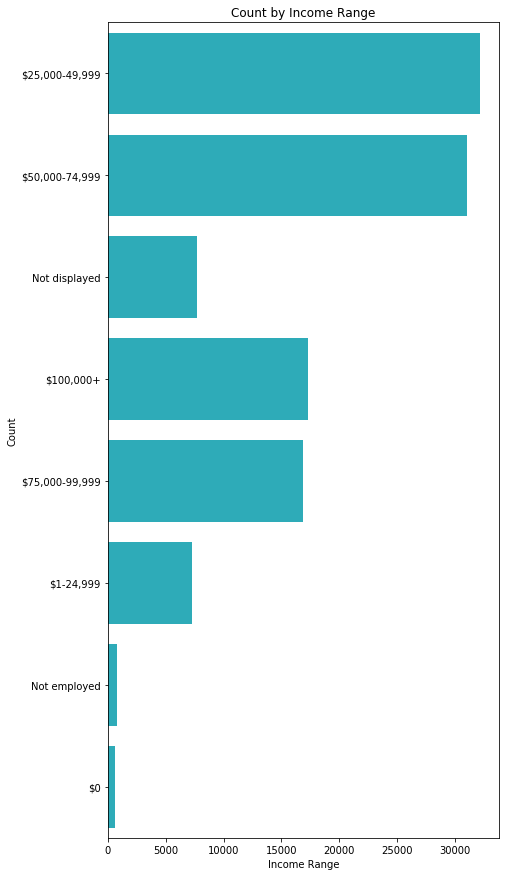

In [39]:
f, ax = plt.subplots(figsize=(7, 15))
ax = sb.countplot(data = df, y="IncomeRange",color=base_color)
ax.set_title('Count by Income Range')
ax.set_xlabel('Income Range')
ax.set_ylabel('Count')

> Distribution across income range shows mid range incomes as the dominant set of users. **Considering the data with number of not available values, choosing to create similar column based on stated monthly income as Monthly_Income_Range and dropping this**

In [40]:
df=df.drop(['IncomeRange'],1)

**Distribution of StatedMonthlyIncome**

Text(0, 0.5, 'Count')

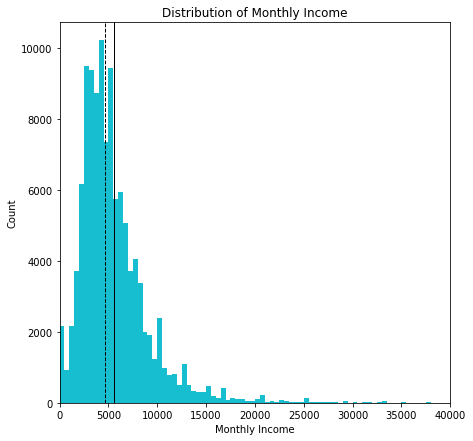

In [41]:
f, ax = plt.subplots(figsize=(7, 7))
bins = np.arange(0,df.StatedMonthlyIncome.max()+500,500)
plt.hist(data=df,x='StatedMonthlyIncome',bins=bins,color=base_color);
plt.xlim(0,40000)
plt.axvline(df['StatedMonthlyIncome'].mean(), color='k', linewidth=1)
plt.axvline(df['StatedMonthlyIncome'].median(), color='k',linestyle='dashed', linewidth=1)
ax.set_title('Distribution of Monthly Income')
ax.set_xlabel('Monthly Income')
ax.set_ylabel('Count')

> Distribution across monthly income is right skewed with median income at 4666. X axis limit is set to maximum of 40k to cut out outliers and zoom into the plot

In [42]:
df.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

> Creating Monthly_Income_Range as ordinal categorical data in place of income range

In [43]:
salary_bins=[0,2500,5000,7500,10000,12500,np.inf]
range_labels = ["< 2500","2501-5000","5001-7500","7501-10000","10000-12500","> 12.5k"]

In [44]:
df['Monthly_Income_Range']=pd.cut(df['StatedMonthlyIncome'],bins=salary_bins,labels=range_labels)

In [45]:
df['Monthly_Income_Range']=df['Monthly_Income_Range'].astype(pd.api.types.CategoricalDtype(ordered = True, categories = range_labels))
df['Monthly_Income_Range'].value_counts()

2501-5000      46354
5001-7500      28001
< 2500         16015
7501-10000     12393
10000-12500     4971
> 12.5k         4809
Name: Monthly_Income_Range, dtype: int64

**Distribution of EstimatedReturn**

Text(0, 0.5, 'Count')

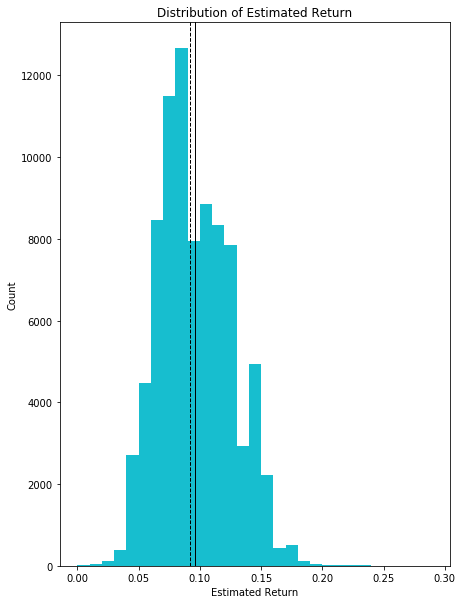

In [46]:
f, ax = plt.subplots(figsize=(7, 10))
bins = np.arange(0,df.EstimatedReturn.max()+0.01,0.01)
plt.hist(data=df,x='EstimatedReturn',bins=bins,color=base_color);
plt.axvline(df['EstimatedReturn'].mean(), color='k', linewidth=1)
plt.axvline(df['EstimatedReturn'].median(), color='k',linestyle='dashed', linewidth=1)
ax.set_title('Distribution of Estimated Return')
ax.set_xlabel('Estimated Return')
ax.set_ylabel('Count')

> Slightly right skewed data with mean estimated return at 9.6%

**Distribution of Prosper Score**

C:\Users\surji\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\surji\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Count')

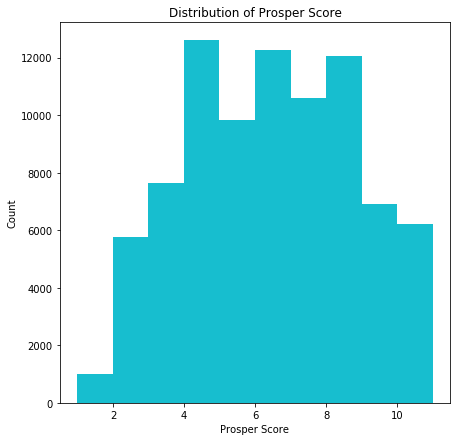

In [47]:
f, ax = plt.subplots(figsize=(7, 7))
plt.hist(data=df,x='ProsperScore',color=base_color)
ax.set_title('Distribution of Prosper Score')
ax.set_xlabel('Prosper Score')
ax.set_ylabel('Count')

> Unable to derive much information from the scores except the triple peaks. More analysis to be done in bivariate & multi variate analysis

**CountPlot of Listing category**

In [48]:
listing_codes_values = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}
df['listing_category']=df['ListingCategory (numeric)'].map(listing_codes_values)
df=df.drop(['ListingCategory (numeric)'],1)

Text(0, 0.5, 'Count(log)')

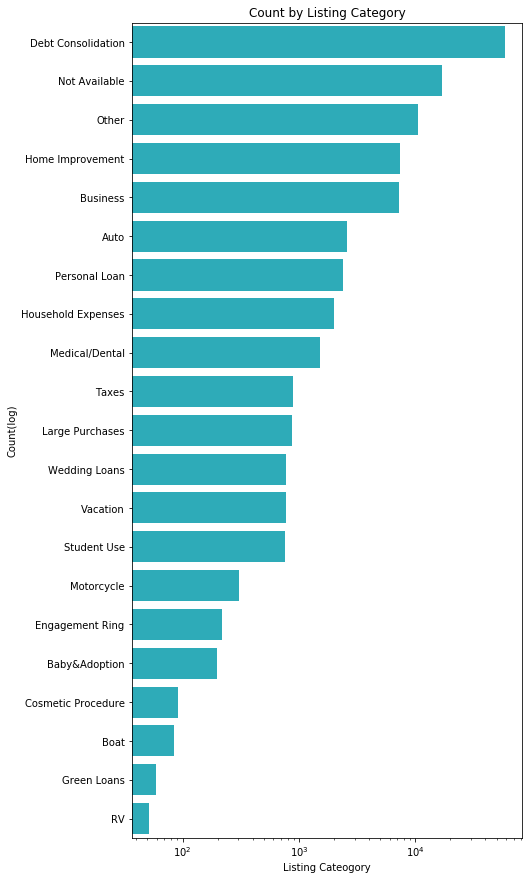

In [49]:
f, ax = plt.subplots(figsize=(7, 15))
order=df['listing_category'].value_counts().index
sb.countplot(data = df, y = 'listing_category',color=base_color,order=order)
plt.xscale('log')
ax.set_title('Count by Listing Category')
ax.set_xlabel('Listing Cateogory')
ax.set_ylabel('Count(log)')

> Taking a closer look at debt consolidation data with Credit_Rating & loan status. 

In [50]:
df[df['listing_category']=='Debt Consolidation']['Credit_Rating'].value_counts()

C     13742
B     11815
A     10350
D      9092
E      5962
AA     3753
HR     3528
Name: Credit_Rating, dtype: int64

In [51]:
df[df['listing_category']=='Debt Consolidation'].LoanStatus.value_counts()

Current                   39194
Completed                 13167
Chargedoff                 3655
Past Due                   1131
Defaulted                  1045
FinalPaymentInProgress      115
Name: LoanStatus, dtype: int64

> Using log scale to have a closer look at smaller categories while debt consolidation is by far the largest listing category

**Distribution of Debt to Income Ratio**

Text(0, 0.5, 'Count')

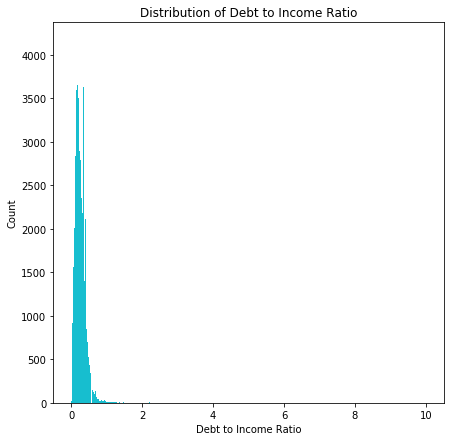

In [52]:
f, ax = plt.subplots(figsize=(7, 7))
bins = np.arange(0,df.DebtToIncomeRatio.max()+0.01,0.01)
plt.hist(data=df,x='DebtToIncomeRatio',bins=bins,color=base_color);
ax.set_title('Distribution of Debt to Income Ratio')
ax.set_xlabel('Debt to Income Ratio')
ax.set_ylabel('Count')

> Distribution on debt to income ratio does not provide much information. Using axis limits to zoom into the picture

Text(0, 0.5, 'Count')

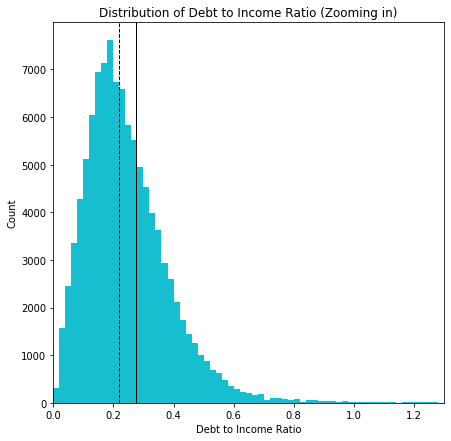

In [53]:
f, ax = plt.subplots(figsize=(7, 7))
bins = np.arange(0,df.DebtToIncomeRatio.max()+0.02,0.02)
plt.hist(data=df,x='DebtToIncomeRatio',bins=bins,color=base_color);
plt.xlim(0,1.3);
plt.axvline(df['DebtToIncomeRatio'].mean(), color='k', linewidth=1)
plt.axvline(df['DebtToIncomeRatio'].median(), color='k',linestyle='dashed', linewidth=1)
ax.set_title('Distribution of Debt to Income Ratio (Zooming in)')
ax.set_xlabel('Debt to Income Ratio')
ax.set_ylabel('Count')

In [54]:
df['DebtToIncomeRatio'].mean()

0.2759466040063403

In [55]:
df['DebtToIncomeRatio'].median()

0.22

> Again a right skewed distrubution with mean & median at 0.27 & 0.22 respectively

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>Answered together with below question as one answer was leading to another

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 1) Prosper Rating & credit grade Seems to imply same set of information with different timeframes (before and after july 2009. For my analysis, i decided them to combine both as combined Credit_Rating <br>

>2) On Credit_Rating, My hypothesis was that people with lower Credit_Rating would prefer this type of platform as people with higher rating might rely on traditional banking channels. I was proven wrong and spectacularly so. the people with high rating (AA & A) are significantly higher than the ones with HR & E<br>

> 3) In Loan status column different subsets of Past due were clubbed together under one value and to simplify this Furthur, i classified them into good loan & bad loan in new column called'Loan quality'<br>


>4) Borrower rate seems to have peaks which is very far off from each other.<br>

>5) As hypothesized, Loan Amount seemed to be of smaller sizes with few outliers as well.<br>

>6) Income range data as given was not significantly useful since monthly income was already provide with much less null values. replaced this with Monthly_Income_Range<br>

>7) Few of Estimated return values seemed closed to zero which was curious, like why would i lend money at near 0 rates when traditional banking is offering more.Curious but enough to deep dive into this small set of values<br>

>8) Bulk of the listing category was Debt consolidation. Usually such an option is taken if your income is regular and you have a good credit score.On a closer look significant number of people(18582) are with rating of D , E & HR which was odd.<br>

>9) The bar chart on occupation showed that many of students were classified into different sub categories, since i will not be using this column further, i did not consolidate these categories together (like all students & tradesmen together)<br>

>10) Bar chart of Listing category require a log transformation to see the categories with smaller count

>11) Similarly bar chart by occupation required a log transformation

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [56]:
# Carving out the data with bad loan & good loan as two separate data frames to be used when required
df_bad_loan = df[df['Quality_of_Loan']=='Bad Loan']
df_bad_loan=df_bad_loan.drop(['Quality_of_Loan'],1)
df_good_loan = df[df['Quality_of_Loan']=='Good Loan']
df_good_loan=df_good_loan.drop(['Quality_of_Loan'],1)

**Starting with pairplot & correlation heatmap to understand where there is relationships to drilldown furthur**
> For Borrower rate the good loans seems to be right skewed and the bad loans to be left skewed.

> For prosper score the bad loan is distributed to the left of the good loans indicating more bad than good at lower prosper scores and vice versa at higher scores

Text(0.5, 0.98, 'Correlation between variables with Loan quality as 3rd variable')

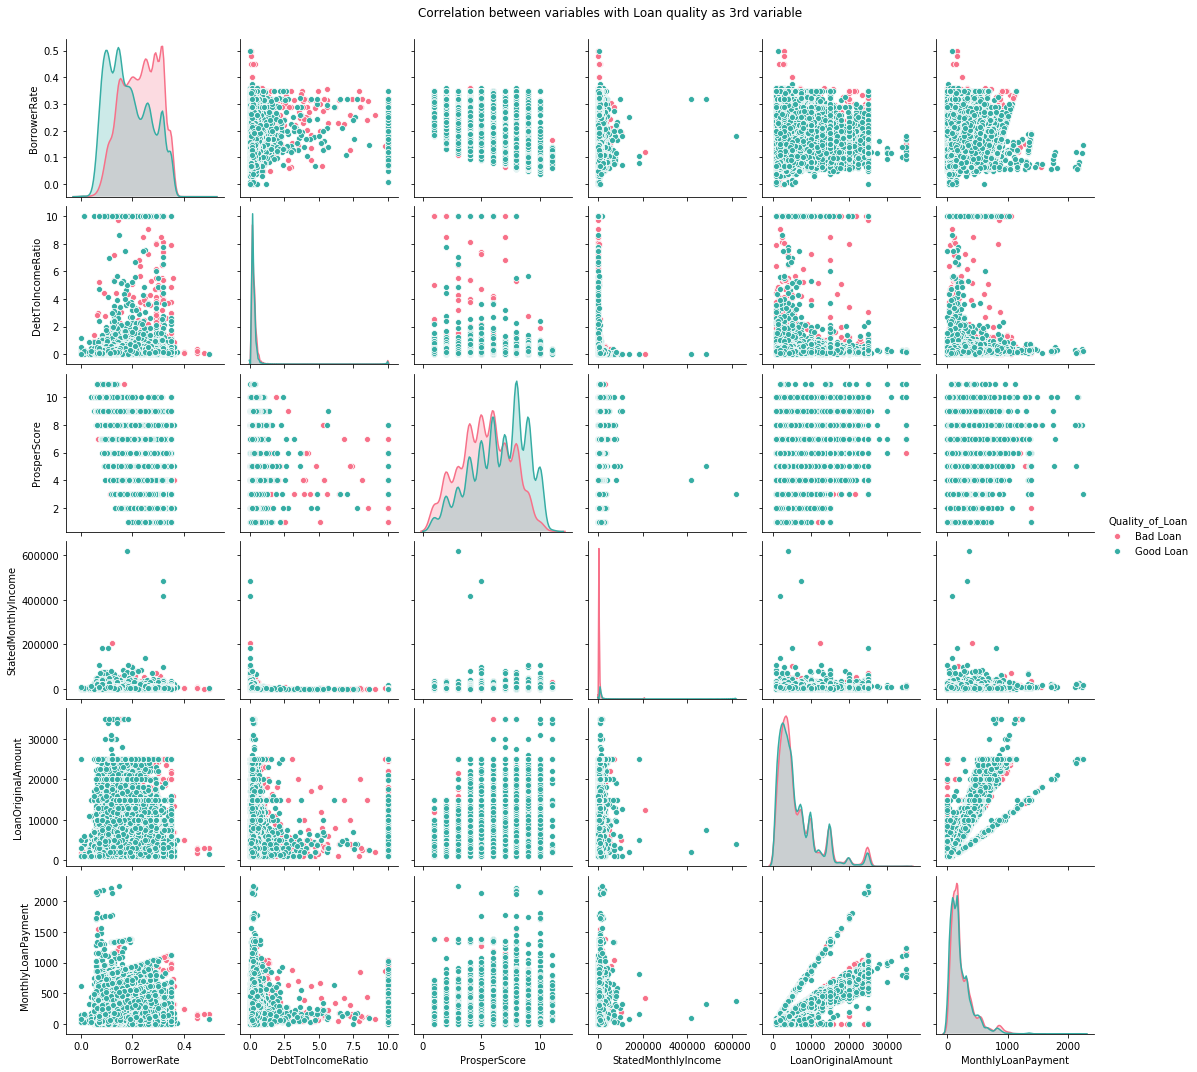

In [57]:
correlation_columns = ['Quality_of_Loan','BorrowerRate','DebtToIncomeRatio','ProsperScore','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment']
corr1_df = df[correlation_columns]
pp = sb.pairplot(corr1_df, hue='Quality_of_Loan',diag_kind="kde",palette='husl')
plt.subplots_adjust(top=0.95)
pp.fig.suptitle('Correlation between variables with Loan quality as 3rd variable')

**Correlation Heatmap to quantify relationships**

Text(0.5, 1, 'Correlation Heatmap')

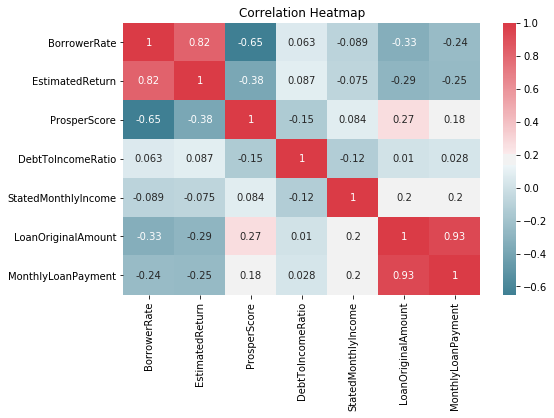

In [58]:
corr = df.loc[:,(df.dtypes == 'float64')|(df.dtypes == 'int64')].corr()
f, ax = plt.subplots(figsize=(8, 5))
ax = sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,ax=ax,annot=True, cmap=sb.diverging_palette(220, 10, as_cmap=True))
ax.set_title('Correlation Heatmap')

**Correlation Heatmap for Bad Loan**

Text(0.5, 1, 'Correlation Heatmap (Bad loans)')

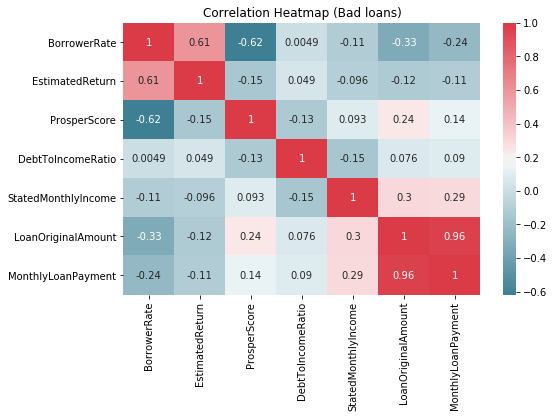

In [59]:
corr = df_bad_loan.loc[:,(df_bad_loan.dtypes == 'float64')|(df_bad_loan.dtypes == 'int64')].corr()
f, ax = plt.subplots(figsize=(8, 5))
ax = sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,ax=ax,annot=True, cmap=sb.diverging_palette(220, 10, as_cmap=True))
ax.set_title('Correlation Heatmap (Bad loans)')

**Correlation Heatmap for Good Loan**

Text(0.5, 1, 'Correlation Heatmap (Good loans)')

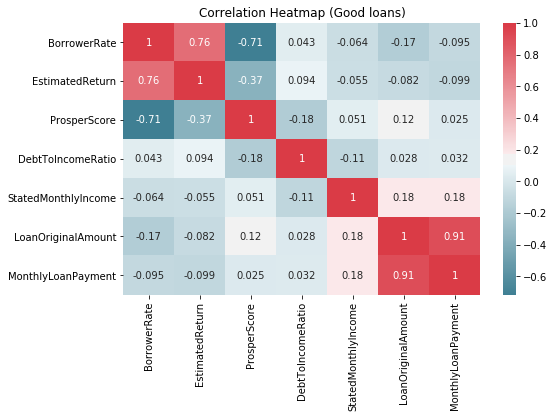

In [60]:
corr = df_good_loan.loc[:,(df_good_loan.dtypes == 'float64')|(df_good_loan.dtypes == 'int64')].corr()
f, ax = plt.subplots(figsize=(8, 5))
ax = sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,ax=ax,annot=True, cmap=sb.diverging_palette(220, 10, as_cmap=True))
ax.set_title('Correlation Heatmap (Good loans)')

In [61]:
biv_base_color = sb.color_palette()[1]

**Borrower Rate vs Debt to Income ratio**
>This was expected to have strong positive correlation. Higher the debt to income higher will be the borrower rate. But understandably borrower rate hits a ceiling around 0.31 to 0.35 mark weakening the correlation coefficient. Of course you cannot keep increasing borrower rate forever, which will make your platform unattractive for users with high debt. Believe adding Credit_Rating will throw more light into this hypothesis.

Text(0, 0.5, 'Borrower Rate')

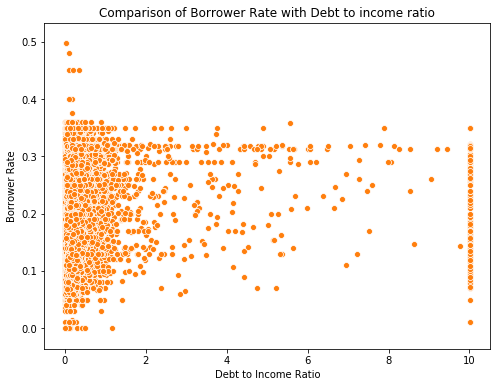

In [62]:
f, ax = plt.subplots(figsize=(8, 6))
sb.scatterplot(data=df,y='BorrowerRate',x='DebtToIncomeRatio',color=biv_base_color)
ax.set_title('Comparison of Borrower Rate with Debt to income ratio')
ax.set_xlabel('Debt to Income Ratio')
ax.set_ylabel('Borrower Rate')

**Loan Status vs Prosper Score**

Text(0, 0.5, 'Prosper Score')

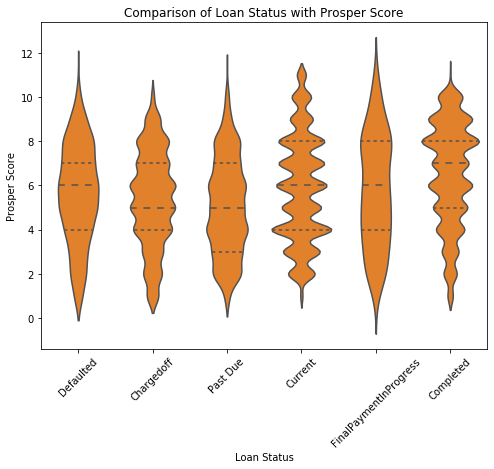

In [63]:
f, ax = plt.subplots(figsize=(8, 6))
sb.violinplot(data=df,x='LoanStatus',y='ProsperScore',color=biv_base_color,inner='quartile')
plt.xticks(rotation=45)
ax.set_title('Comparison of Loan Status with Prosper Score')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Prosper Score')

>Loan Status vs Prosper Score : If prosper score signifies risk, then more defaulters should be in lower score range while high scores having more completed loans. This trend broadly holds good with this plot as we move from defaulted to completed loans, although defaulted loans are evenly spread above and below 6 mark.

**Credit Rating  vs Prosper Score**

Text(0, 0.5, 'Prosper Score')

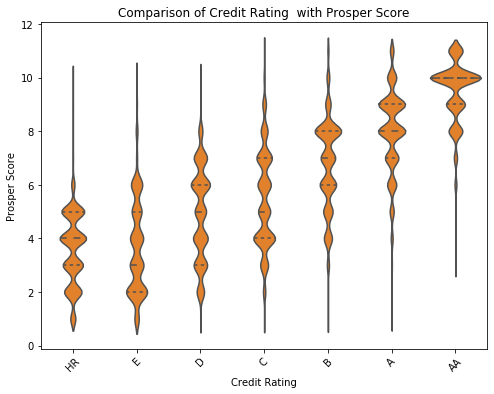

In [64]:
f, ax = plt.subplots(figsize=(8, 6))
sb.violinplot(data=df,x='Credit_Rating',y='ProsperScore',color=biv_base_color,inner='quartile')
plt.xticks(rotation=45)
ax.set_title('Comparison of Credit Rating  with Prosper Score')
ax.set_xlabel('Credit Rating')
ax.set_ylabel('Prosper Score')

>Credit_Rating  vs Prosper Score: This relation was expected to be linear and plot summarizes that. Checked for surprises & None exists to the naked eye.would not drill further into this.

**Borrower Rate over the years**

In [65]:
df['ListingCreationDate']=pd.to_datetime(df['ListingCreationDate'])
df['listing_year'] = df['ListingCreationDate'].dt.year
df=df.drop(['ListingCreationDate'],1)

Text(0, 0.5, 'Borrower Rate')

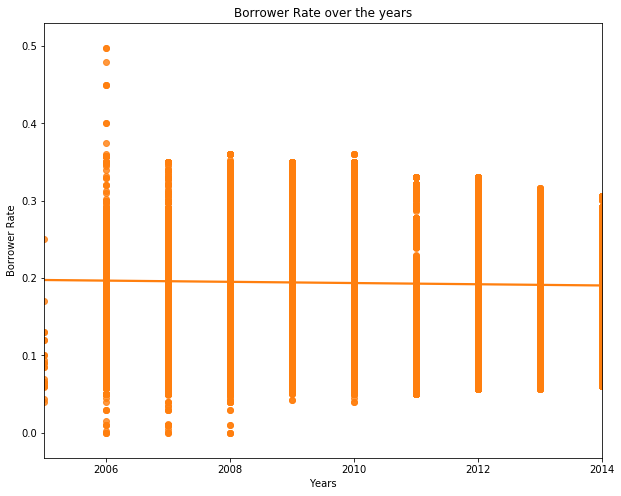

In [66]:
f, ax = plt.subplots(figsize=(10, 8))
sb.regplot(data=df,y='BorrowerRate',x='listing_year',color=biv_base_color)
ax.set_title('Borrower Rate over the years')
ax.set_xlabel('Years')
ax.set_ylabel('Borrower Rate')

>Borrower Rate over the years: Was low during starting years rising to a peak in 2011 and dropping ever since.The range of borrower rate seems to be getting smaller as well

**Monthly_Income_Range vs Loan Status**

>To show the difference in loan performance among the income groups we have to write a function which provides % split within the income group among various hues with help from a stackoverflow.com thread.

In [67]:
def with_hue(data,x,hue_y,title,xtitle): 
    df1 = data.groupby(x)[hue_y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('Percent').reset_index()
    g = sb.catplot(x=x,y='Percent',hue=hue_y,kind='bar',data=df1,)
    g.ax.set_ylim(0,100)
    g.ax.set_title(title)
    g.ax.set_xlabel(xtitle)    
    for p in g.ax.patches:
        txt = str(p.get_height().round().astype(int)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)

In [68]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Name: LoanStatus, dtype: int64

Text(0, 0.5, 'Count')

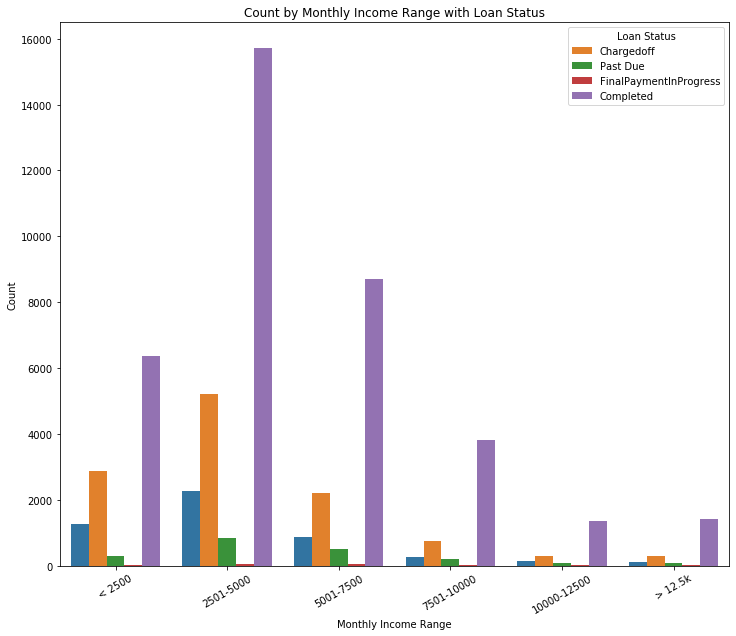

In [69]:
f, ax = plt.subplots(figsize=(12, 10))
sb.countplot(data=df,x='Monthly_Income_Range',hue='LoanStatus',hue_order=['Defaulted','Chargedoff','Past Due','FinalPaymentInProgress','Completed'])
plt.xticks(rotation=30)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], title='Loan Status',loc=1)
ax.set_title('Count by Monthly Income Range with Loan Status')
ax.set_xlabel('Monthly Income Range')
ax.set_ylabel('Count')

>Monthly_Income_Range vs Loan Status: This plot doesn't reveal much on the Loan performance within the income groups due to the tall values. Good that we created Quality of loan value for this

**Monthly_Income_Range vs Quality of Loan**
>Now this is the type of chart that shows why data is king and motivates people like me to pursue this discipline of data analytics. The number of bad loans as % within 2 high income group (>12.5 & 10k to 12.5k) is actually greater than the one at the middle income group (7501-10k). Brilliant surprise although a small one ! Worth the wait.

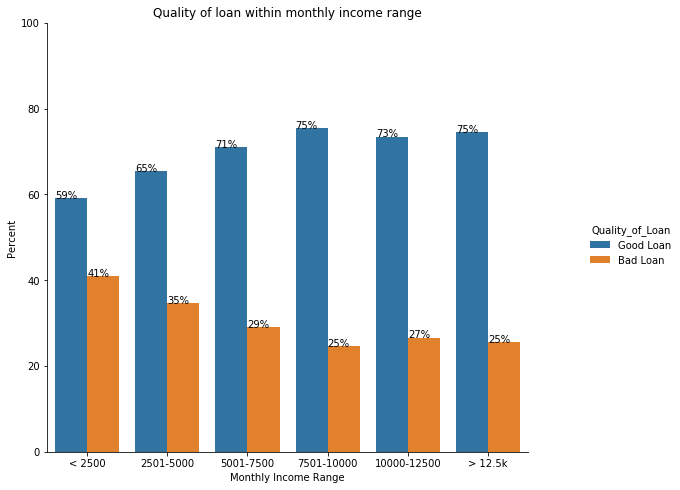

In [70]:
with_hue(df,'Monthly_Income_Range', 'Quality_of_Loan','Quality of loan within monthly income range','Monthly Income Range')
plt.gcf().set_size_inches(10, 7)

**EstimatedReturn vs Credit_Rating**

Text(0, 0.5, 'Estimated Return')

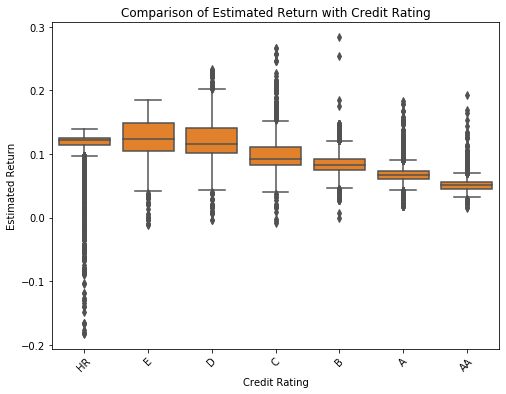

In [71]:
f, ax = plt.subplots(figsize=(8, 6))
sb.boxplot(data=df,x='Credit_Rating',y='EstimatedReturn',color=biv_base_color)
plt.xticks(rotation=45)
ax.set_title('Comparison of Estimated Return with Credit Rating')
ax.set_xlabel('Credit Rating')
ax.set_ylabel('Estimated Return')

>EstimatedReturn vs Credit_Rating: This is on expected lines as well, higher credit rating means lower borrower rate thereby lesser estimated return. The HR rating has many outliers towards negative end, which implies many bad loans in this category leading to loss of money for investors. No surprises

**DebtToIncomeRatio vs LoanStatus**

Text(0, 0.5, 'Debt To Income Ratio')

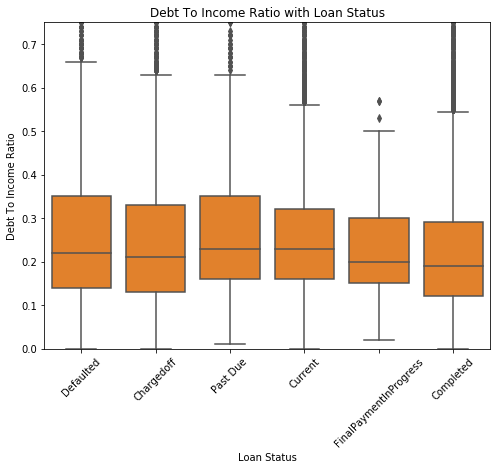

In [72]:
f, ax = plt.subplots(figsize=(8, 6))
sb.boxplot(data=df,x='LoanStatus',y='DebtToIncomeRatio',color=biv_base_color)
plt.xticks(rotation=45)
plt.ylim(0,0.75)
ax.set_title('Debt To Income Ratio with Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Debt To Income Ratio')

>DebtToIncomeRatio vs LoanStatus: Higher debt to income ratio here corresponds to more default, past due cases. Curiously median of 'Current' in progress loans have high debt to income ratio which implies the risk in current portfolio of borrowers

**StatedMonthlyIncome vs Borrower Rate**

Text(0, 0.5, 'Borrower Rate')

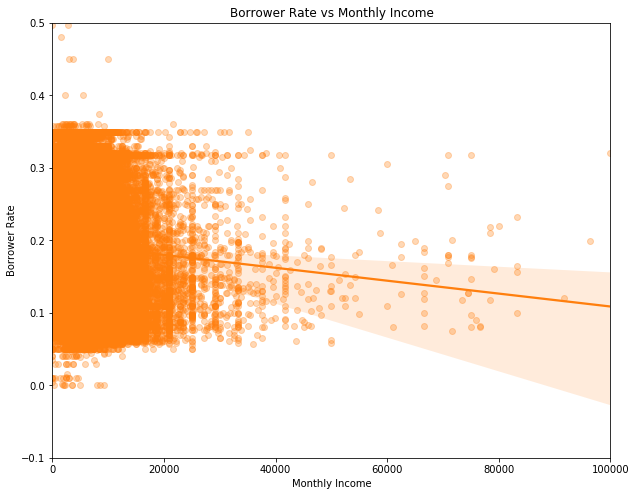

In [73]:
f, ax = plt.subplots(figsize=(10, 8))
sb.regplot(data=df,y='BorrowerRate',x='StatedMonthlyIncome',color=biv_base_color,scatter_kws= {'alpha':0.3})
plt.ylim(-0.1,0.5)
plt.xlim(0,100000)
ax.set_title('Borrower Rate vs Monthly Income')
ax.set_xlabel('Monthly Income')
ax.set_ylabel('Borrower Rate')

>StatedMonthlyIncome vs Borrower Rate: Expected decrease in borrower rate as we move to higher incomes.

**Monthly Income vs Monthly Loan Payment**

Text(0, 0.5, 'Monthly Loan Payment')

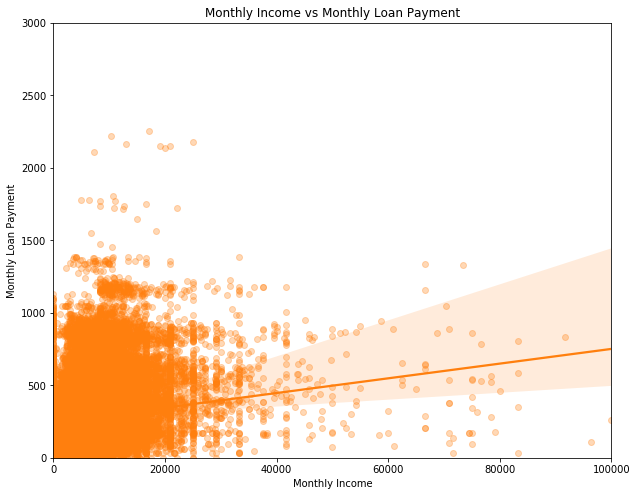

In [74]:
f, ax = plt.subplots(figsize=(10, 8))
sb.regplot(data=df,y='MonthlyLoanPayment',x='StatedMonthlyIncome',color=biv_base_color,scatter_kws= {'alpha':0.3})
plt.ylim(0,3000)
plt.xlim(0,100000)
ax.set_title('Monthly Income vs Monthly Loan Payment')
ax.set_xlabel('Monthly Income')
ax.set_ylabel('Monthly Loan Payment')

>StatedMonthlyIncome vs LoanAmount: Expected increase in Loan Amount as we move to higher incomes

**Monthly_Income_Range vs Credit_Rating**

(0, 30)

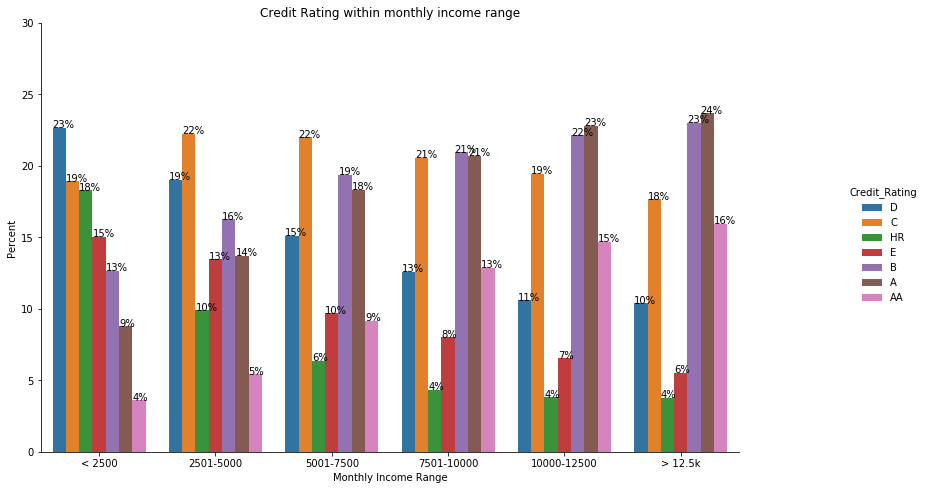

In [75]:
with_hue(df,'Monthly_Income_Range', 'Credit_Rating','Credit Rating within monthly income range','Monthly Income Range')
plt.gcf().set_size_inches(14, 7)
plt.ylim(0,30)

>Monthly_Income_Range vs Credit_Rating: Expected increase in Credit rating as we move to higher incomes. But considering the above finding, higher rating doesnt necessarily mean lower risk

**BorrowerReturn vs Loan Status**
> Bad loans (default, chargedoff, past due) have higher borrwer rate which indicates the risk built in during the rate assignment.

Text(0, 0.5, 'Loan Status')

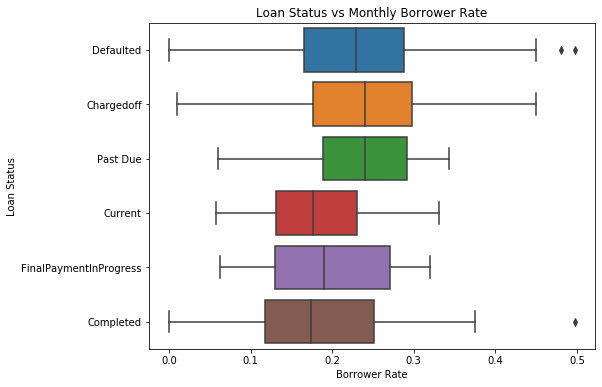

In [76]:
f, ax = plt.subplots(figsize=(8, 6))
sb.boxplot(data = df, y='LoanStatus',x = 'BorrowerRate')
ax.set_title('Loan Status vs Monthly Borrower Rate')
ax.set_xlabel('Borrower Rate')
ax.set_ylabel('Loan Status')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Straight up used pairplot & correlation charts to identify the relationships to deep dive. To my disappointment the two charts did not throw many new correlations. the ones between Borrower rate -Estimated return & Loan amount- monthly loan payment were expected and would have been a curious case if they were not that strongly related.<br>

> Borrower Rate vs Debt to Income ratio. This was expected to have strong positive correlation. Higher the debt to income higher will be the borrower rate. But understandably borrower rate hits a ceiling around 0.31 to 0.35 mark weakening the correlation coefficient. Of course you cannot keep increasing borrower rate forever, which will make your platform unattractive for users with high debt. Believe adding Credit rating will throw more light into this hypothesis.<br>

>Loan Status vs Prosper Score : If prosper score signifies risk, then more defaulters should be in lower score range while high scores having more completed loans. This trend broadly holds good with this plot as we move from defaulted to completed loans, although defaulted loans are evenly spread above and below 6 mark.<br>

>Credit Rating  vs Prosper Score: This relation was expected to be linear and plot summarizes that. Checked for surprises & None exists to the naked eye. would not drill further into this<br>

>Monthly_Income_Range vs Loan Status: This plot doesn't reveal much on the Loan performance within the income groups due to the tall current status values. Good that we created Quality of loan value for this.<br>

> Monthly_Income_Range vs Quality of Loan: Now this is the type of chart that shows why data is king and motivates people like me to pursue this discipline of data analytics. The number of bad loans as % within 2 high income group (>12.5 & 10k to 12.5k) is actually greater than the one at the middle income group (7501-10k).  Brilliant surprise ! <br>

> EstimatedReturn vs Credit_Rating: This is on expected lines as well, higher credit rating means lower borrower rate thereby lesser estimated return. The HR rating has many outliers towards negative end, which implies many bad loans in this category leading to loss of money for investors<br>

> DebtToIncomeRatio vs LoanStatus: Higher debt to income ratio here corresponds to more default, past due cases. Curiously median of 'Current' in progress loans have high debt to income ratio which implies the risk in current portfolio of borrowers<br>

>Monthly_Income_Range vs Credit_Rating: Expected increase in Credit rating as we move to higher incomes. But considering the above finding, higher rating doesnt necessarily mean lower risk<br>

> BorrowerReturn vs Loan Status: Similar patterns as above, Bad loans (default, chargedoff, past due) have higher borrwer rate which indicates the risk built in during the rate assignment.<br>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>Borrower Rate over the years: Was low during starting years rising to a peak in 2011 and dropping ever since. The range of borrower rate seems to be getting smaller as well<br>
**Could not dive deep into other features as there were plenty to ponder in main features**

## Multivariate Exploration

**How Debt to Income Ratio affects borrower Rate? Hue on Credit Rating**
>This visual is a follow up to the bivariate plot of the same two parameters but with credit rating added as hue. This helps in much clearer picture of the layers within borrower rate which are stacked as per credit rating. Top layer populated heavily by high risk and so on.

Text(0, 0.5, 'Borrower Rate')

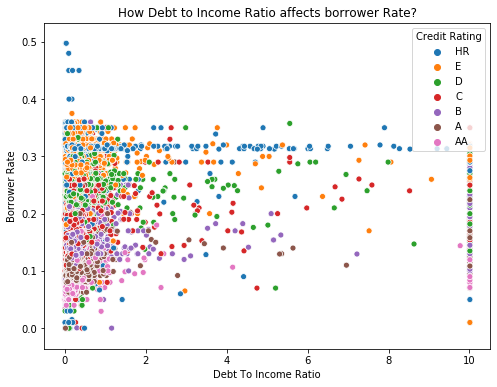

In [77]:
f, ax = plt.subplots(figsize=(8, 6))
sb.scatterplot(data=df,y='BorrowerRate',x='DebtToIncomeRatio',hue='Credit_Rating',hue_order = ['HR','E','D','C','B','A','AA'])
plt.legend(loc=1, fontsize = 9)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], title='Credit Rating',loc=1)
ax.set_title('How Debt to Income Ratio affects borrower Rate?')
ax.set_xlabel('Debt To Income Ratio')
ax.set_ylabel('Borrower Rate')

**How strong is relation between Estimated Return & Borrower Rate? Hue on Credit Rating**
>Ofcourse borrower rate causes the estimated return. This visual was not explored in bivariate as the strong relationship is on expected lines but becomes much more interesting when credit rating is added as the hue. the layers are clearly visible and almost demarcated which signifies the significance of credit rating on the variables.  

Text(0, 0.5, 'Estimated Return')

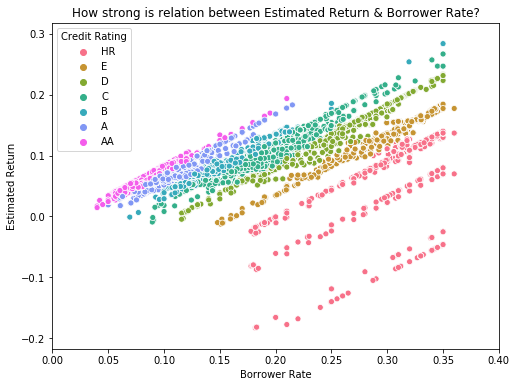

In [78]:
f, ax = plt.subplots(figsize=(8, 6))
sb.scatterplot(data=df,x='BorrowerRate',y='EstimatedReturn',hue="Credit_Rating",hue_order = ['HR','E','D','C','B','A','AA'], palette='husl')
plt.xlim(0,0.4)
plt.legend(loc=1, fontsize = 9)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], title='Credit Rating',loc=0)
ax.set_title('How strong is relation between Estimated Return & Borrower Rate?')
ax.set_xlabel('Borrower Rate')
ax.set_ylabel('Estimated Return')

**Does Monthly Income affect the Borrower Rate at all? Hue on Credit Rating**
>While strong relation between Borrower rate and credit rating is already established, this graph was plotted to check if monthly income has any effect on the borrower rate. Unfortunately the answer is it does not affect rate significantly. This graph is significant for me as an expected relationship as per inital hunch does not exist. To summarize the message to prosper users "Irrespective of what your income is , if your credit rating is bad, you have to pay higher rate". Fair enough !

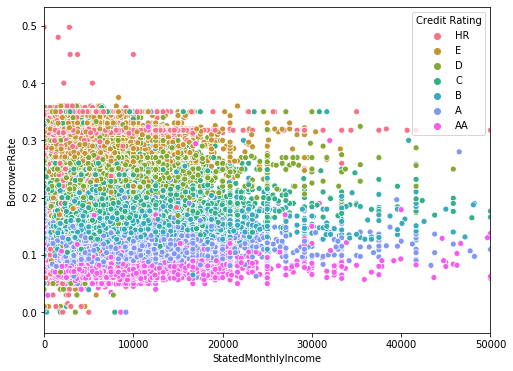

In [79]:
f, ax = plt.subplots(figsize=(8, 6))
sb.scatterplot(data=df,x='StatedMonthlyIncome',y='BorrowerRate',hue="Credit_Rating",hue_order = ['HR','E','D','C','B','A','AA'], palette='husl')
plt.xlim(0,50000)
plt.legend(loc=1, fontsize = 9)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], title='Credit Rating',loc=1)

**Are there more bad loans as monthly loan payment increases as a proportion to monthly income? the plot has been split with respect to credit rating & LoanStatus for a better understanding of the data**
> Unable to get to definitive answer with the below graphs

Text(0.5, 0.98, 'Monthly Loan Paymentagainst Monthly Income (sliced by loan status & credit Rating)')

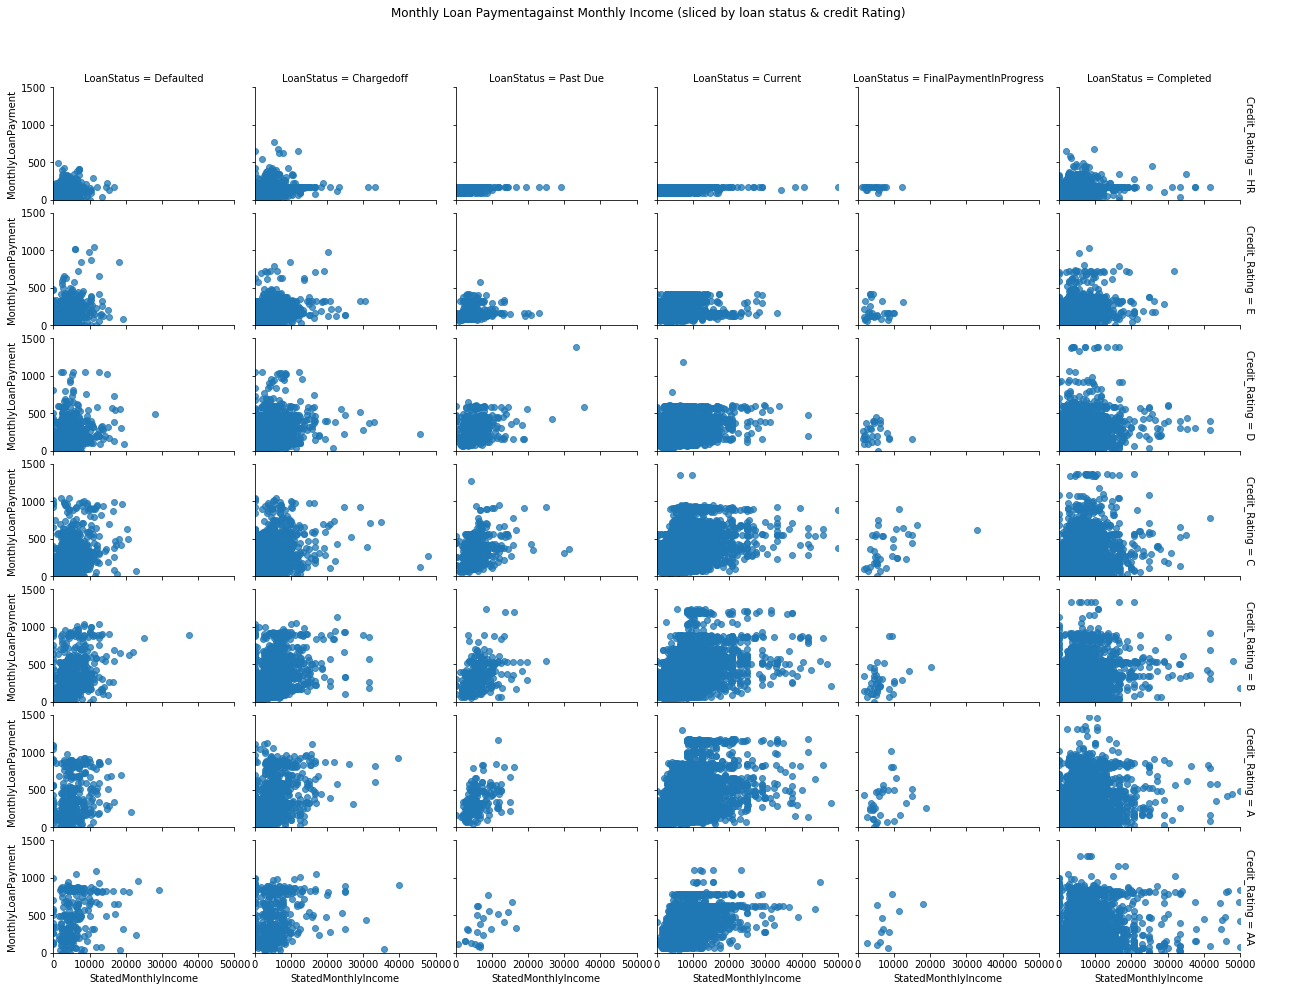

In [80]:
g=sb.FacetGrid(data=df, col='LoanStatus', row='Credit_Rating',margin_titles=True,height=2,aspect=1.5)
g.map(plt.scatter,'StatedMonthlyIncome','MonthlyLoanPayment',alpha=0.75)
plt.xlim(0,50000)
plt.ylim(0,1500)
g.add_legend()
plt.subplots_adjust(top=0.90)
g.fig.suptitle('Monthly Loan Paymentagainst Monthly Income (sliced by loan status & credit Rating)')

**Does debt to income ratio affect estimated return? Hue on Quality of loan**
>While good and bad loans seems to have no particular pattern between ratio of 0 to 2, there are lot more bad loan in higher ratios between estimated return of 0.1 to 0.2. This could be because of scale of data available within this range and rarely people complete loans when they are that high on the debt. Not to delve too much into it.

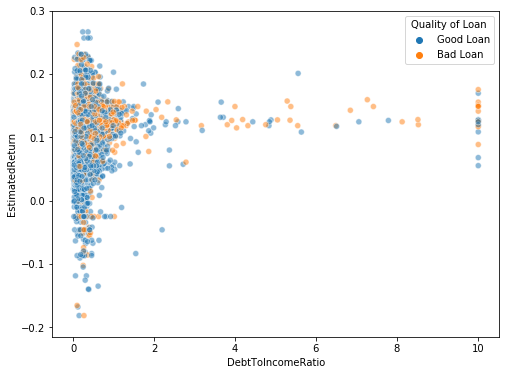

In [81]:
f, ax = plt.subplots(figsize=(8, 6))
sb.scatterplot(data=df,x='DebtToIncomeRatio',y='EstimatedReturn',hue="Quality_of_Loan", alpha=0.5)
plt.legend(loc=1, fontsize = 9)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], title='Quality of Loan',loc=1)

In [82]:
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [83]:
df.EmploymentStatus.replace('Not available', np.nan, inplace=True)

**Who can be the possible target customer segment based on employment status? Hue on Credit rating**
> The x and y axis has been taken as Monthly income & estimated Return. The group with high risk and return seems to be Employed + Full time group with relatively lower credit rating of D & E  with good loans return between 0.1 and 0.2 

Text(0.5, 0.98, 'Estimated Return against Monthly Income (hue on credit Rating)')

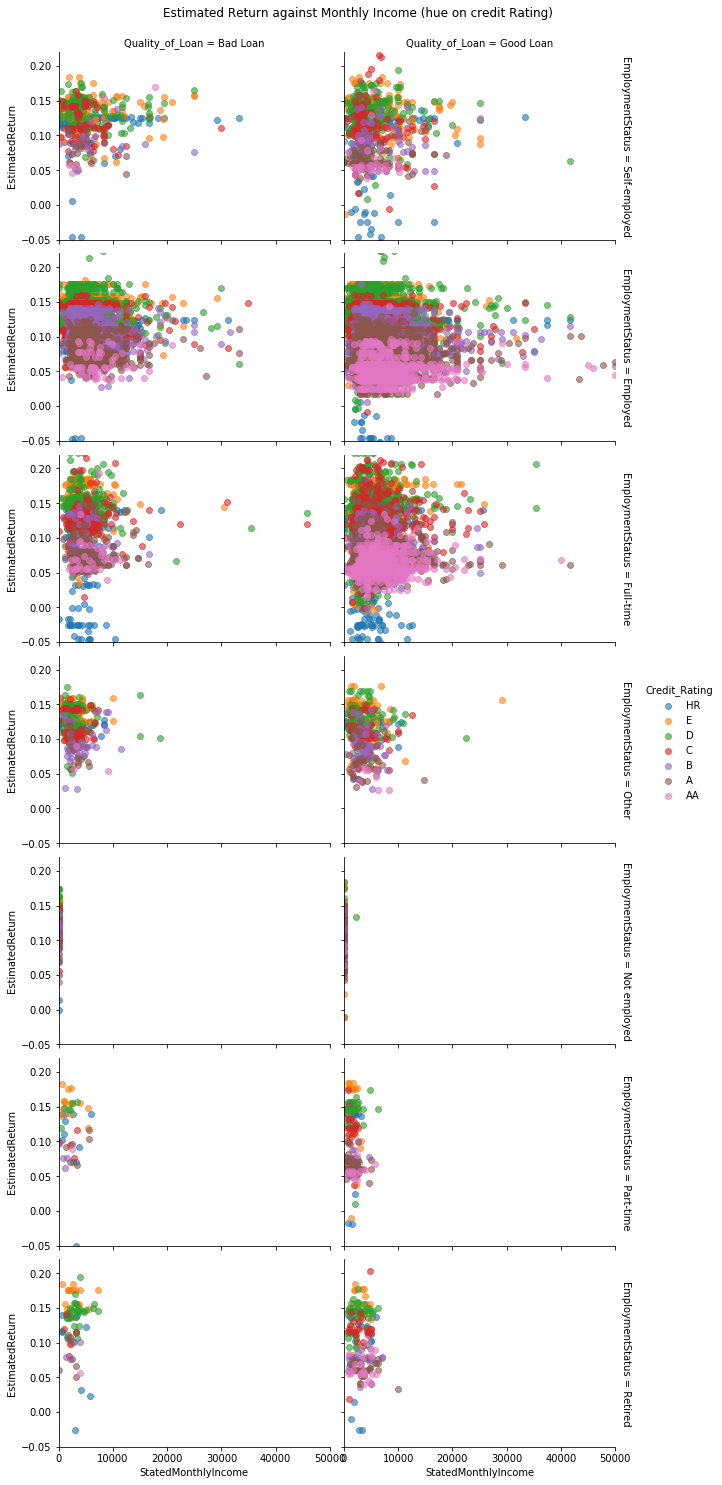

In [84]:
g=sb.FacetGrid(data=df, row='EmploymentStatus', col='Quality_of_Loan',hue='Credit_Rating',margin_titles=True,height=3,aspect=1.5)
g.map(plt.scatter,'StatedMonthlyIncome','EstimatedReturn',alpha=0.6)
plt.xlim(0,50000)
plt.ylim(-0.05,0.22)
g.add_legend()
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Estimated Return against Monthly Income (hue on credit Rating)')

**Did prosper score get it right when it comes to estimated return ? Hue on credit rating**

> Separating into good loan and bad loan, we notice that both looks similar in pattern except few points that stands out in the lower & middle scores. <br>
1) There seems to be many HR rated good loans which were assigned lower prosper score (0 to 4), in lower income groups (< 7500 monthly income) <br> 2) There is a good amount of AA rated good loans when compared to bad loans in the scores between 6 & 8<br>
*One inference is clear, Prosper scores aren't perfect as very few things are in the world with room to improve*

Text(0.5, 0.98, 'Prosper score against Estimated Return (hue on credit Rating)')

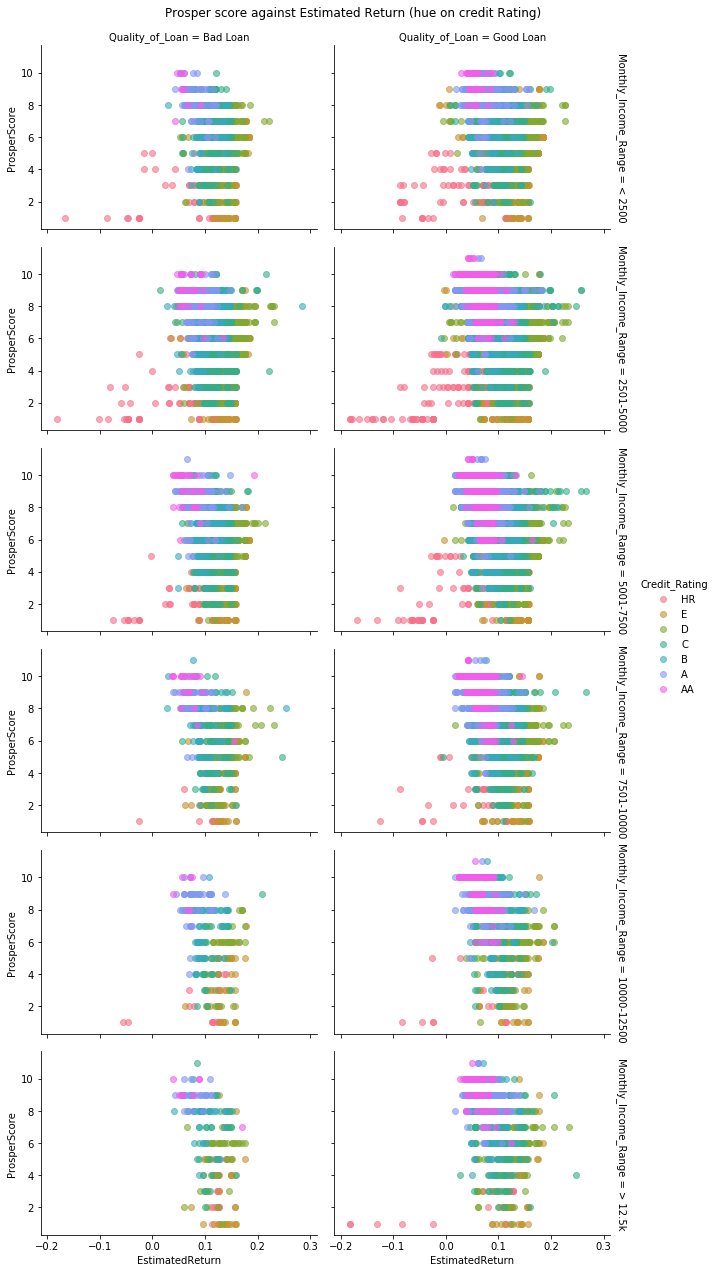

In [85]:
g=sb.FacetGrid(data=df, row='Monthly_Income_Range', col='Quality_of_Loan',hue='Credit_Rating',margin_titles=True,height=3,aspect=1.5, palette='husl')
g.map(plt.scatter,'EstimatedReturn','ProsperScore',alpha=0.6)
g.add_legend()
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Prosper score against Estimated Return (hue on credit Rating)')

**How strong a factor is debt to income ratio?**

> Heatmap on average debt to income ratio by Income range and Quality of loan indicates expected difference between good and bad loan with huge spike in income group of <2500

Text(0.5, 33.0, 'Quality of Loan')

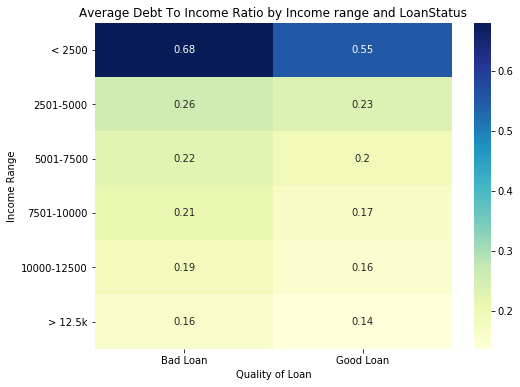

In [86]:
heatmap_df2 = df.groupby(['Monthly_Income_Range','Quality_of_Loan']).DebtToIncomeRatio.mean().reset_index()
hm_data2 = heatmap_df2.pivot('Monthly_Income_Range','Quality_of_Loan','DebtToIncomeRatio')
fig, ax = plt.subplots(figsize=(8, 6))
ax = sb.heatmap(hm_data2,ax=ax, annot=True,cmap="YlGnBu")
ax.set_title('Average Debt To Income Ratio by Income range and LoanStatus')
ax.set_ylabel('Income Range')
ax.set_xlabel('Quality of Loan')

**We now know Prosper score did not get everything right. How do we quantify the key misses?**

> One method which has n partial answer is the heatmap which shows average prosper score with income range in y axis and esitmated return in x axis. In defaulted loans there clearly seems to be an outlier in high income group with high scores. Studying deeper into this will become a separate thread altogether. Leaving that out for this project's scope. 

>Second heatmap with Debt To Income Ratio average by Credit Rating over ProsperScore, shows where prosper score is high with high debt to income ratio while its very clear that the debt to income ratio is a very strong factor in loan defaults.

Text(0.5, 33.0, 'Loan Status')

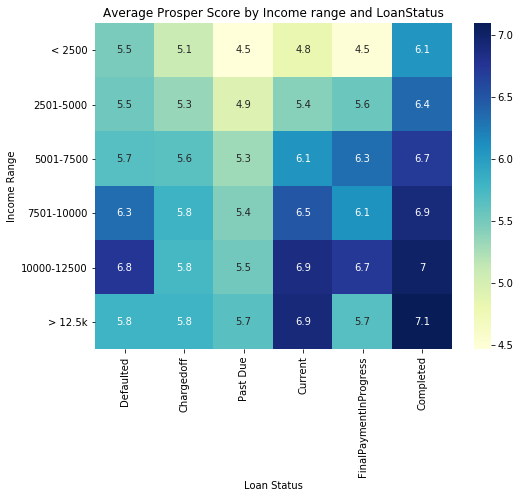

In [87]:
heatmap_df2 = df.groupby(['Monthly_Income_Range','LoanStatus']).ProsperScore.mean().reset_index()
hm_data2 = heatmap_df2.pivot('Monthly_Income_Range','LoanStatus','ProsperScore')
fig, ax = plt.subplots(figsize=(8, 6))
ax = sb.heatmap(hm_data2,ax=ax, annot=True,cmap="YlGnBu")
ax.set_title('Average Prosper Score by Income range and LoanStatus')
ax.set_ylabel('Income Range')
ax.set_xlabel('Loan Status')

Text(51.0, 0.5, 'Prosper Score')

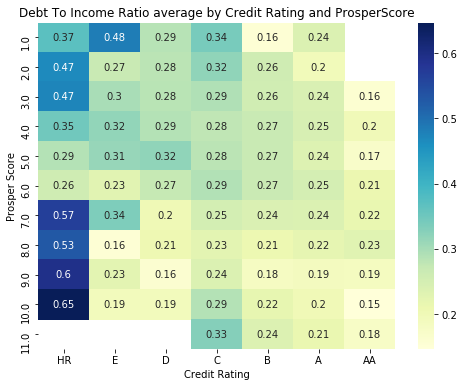

In [88]:
heatmap_df = df.groupby(['ProsperScore','Credit_Rating']).DebtToIncomeRatio.mean().reset_index()
hm_data = heatmap_df.pivot('ProsperScore','Credit_Rating','DebtToIncomeRatio')
fig, ax = plt.subplots(figsize=(8, 6))
ax = sb.heatmap(hm_data,ax=ax, annot=True,cmap="YlGnBu")
ax.set_title('Debt To Income Ratio average by Credit Rating and ProsperScore')
ax.set_xlabel('Credit Rating')
ax.set_ylabel('Prosper Score')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

**How Debt to Income Ratio affects borrower Rate? Hue on Credit Rating**
>This visual is a follow up to the bivariate plot of the same two parameters but with credit rating added as hue. This helps in much clearer picture of the layers within borrower rate which are stacked as per credit rating. Top layer populated heavily by high risk and so on.

**How strong is relation between Estimated Return & Borrower Rate? Hue on Credit Rating**
>Ofcourse borrower rate causes the estimated return. This visual was not explored in bivariate as the strong relationship is on expected lines but becomes much more interesting when credit rating is added as the hue. the layers are clearly visible and almost demarcated which signifies the weight of credit rating on the variables.  

**Does debt to income ratio affect estimated return? Hue on Quality of loan**
>While good and bad loans seems to have no particular pattern between ratio of 0 to 2, there are lot more bad loan in higher ratios between estimated return of 0.1 to 0.2. This could be because of scale of data available within this range and rarely people complete loans when they are that high on the debt. Not to delve too much into it.

**Who can be the possible target customer segment based on employment status? Hue on Credit rating**
> The x and y axis has been taken as Monthly income & estimated Return. The group with highest risk and return seems to be employed + Full time group with relatively lower credit rating of D & E  with good loans return between 0.1 and 0.2

**How strong a factor is debt to income ratio?**
> Heat map on average debt to income ratio by Income range and Quality of loan indicates expected difference between good and bad loan which huge spike in income group of <2500

### Were there any interesting or surprising interactions between features?

**Does Monthly Income affect the Borrower Rate at all? Hue on Credit Rating**
>While strong relation between Borrower rate and credit rating is already established, this graph was plotted to check if monthly income has any effect on the borrower rate. Unfortunately the answer is not enough. This graph is significant for me as an expected relationship as per my hunch does not exist. To summarize the message to users "Irrespective of what your income is , if your credit rating is bad, you have to pay higher rate". Fair Enough !

**Did prosper score get it right when it comes to estimated return ? Hue on credit rating**

> Separating this into good loan and bad loan, we notice that both looks similar in pattern except few points that stands out in the lower & middle scores. <br>
1) There seems to be many HR rated good loans which were assigned lower prosper score (0 to 4), in lower income groups (< 7500 monthly income) <br> 2) There is a good amount of AA rated good loans when compared to bad loans in the scores between 6 & 8<br>
*Prosper scores aren't perfect as very few things are in the world*

**We now know Prosper score did not get everything right. How do we quantify the key misses?**

> One method which has an partial answer is the heatmap which shows average prosper score with income range in y axis and esitmated return in x axis. In defaulted loans there clearly seems to be an outlier in high income group with high scores. Studying deeper into this will become a separate thread altogether. Leaving that out for this report.

>Second heatmap with Debt To Income Ratio average by Credit Rating over ProsperScore, shows where prosper score is high with high debt to income ratio while its definite that the ratio is a very strong factor in loan defaults.